<a href="https://colab.research.google.com/github/cristiandarioortegayubro/BDS/blob/main/modulo.04/bds_algoritmos_008_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p align="center">
<img src="https://github.com/cristiandarioortegayubro/BDS/blob/main/images/Logo%20BDS%20Horizontal%208.png?raw=true">
</p>

<p align="center">
<img src="https://github.com/cristiandarioortegayubro/BDS/blob/main/images/Logo%20Scikit-learn.png?raw=true">
</p>

 # **<font color="DeepPink">Modelos no supervisados: Clustering</font>**

<p align="justify">
Las técnicas de clustering son variadas y nos permiten determinar patrones de agrupamientos que no son fácilmente observables.
<br>
<br>
👀 A continuación se va tratar de segmentar clientes de tarjetas de crédito de los últimos 6 meses. El conjunto de datos contiene un total de 18 variables para ser estudiadas.

In [1]:
import pandas as pd
import sklearn.cluster as cl
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
tarjetas = pd.read_csv("https://raw.githubusercontent.com/cristiandarioortegayubro/BDS/main/datasets/Credit_card_clustering.csv")
tarjetas.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


Los campos que contiene el dataset son los siguientes:


**CUST_ID** : Identificación del titular de la tarjeta de crédito

**BALANCE** : Saldo que queda en la cuenta para realizar compras

**BALANCE_FREQUENCY** : Con qué frecuencia se actualiza el saldo, obtenga una calificación entre 0 y 1 (1 = actualizado con frecuencia, 0 = no actualizado con frecuencia)

**PURCHASES** : Cantidad de compras hecha por la cuenta

**ONEOFF_PURCHASES** : Cantidad de compras máximas realizadas en una cuota

**INSTALLMENTS_PURCHASES** : Cantidad de compras realizadas en una cuota

**CASH_ADVANCE** : Adelantos de efectivo dados por el usuario

**PURCHASES_FREQUENCY** : Con qué frecuencia se realizan las compras, obtenga una puntuación entre 0 y 1 (1 = comprado con frecuencia, 0 = no comprado con frecuencia)

**ONEOFFPURCHASESFREQUENCY** : Con qué frecuencia están ocurriendo las compras en una cuota (1 = comprado con frecuencia, 0 = no comprado con frecuencia)

**PURCHASESINSTALLMENTSFREQUENCY** : Con qué frecuencia se realizan las compras en cuotas (1 = hechas con frecuencia, 0 = no se realiza con frecuencia)

**CASHADVANCEFREQUENCY** : Con qué frecuencia se paga por adelantado

**CASHADVANCETRX** : Número de transacciones realizadas con "adelantos de efectivo"

**PURCHASES_TRX** : Número de compras realizadas

**CREDIT_LIMIT** : Límite de crédito del usuario

**PAYMENTS** : Cantidad de pagos hechos por usuario

**MINIMUM_PAYMENTS** : Cantidad mínima de pagos hechos por usuario

**PRCFULLPAYMENT** : Porcentaje del pago completo hecho por usuario

**TENURE** : Tenencias del servicio de tarjetas de crédito por usuario

 # **<font color="DeepPink">Análisis exploratorio de los datos</font>**

In [3]:
tarjetas.dtypes

CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

In [4]:
tarjetas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

<Axes: xlabel='BALANCE', ylabel='PURCHASES'>

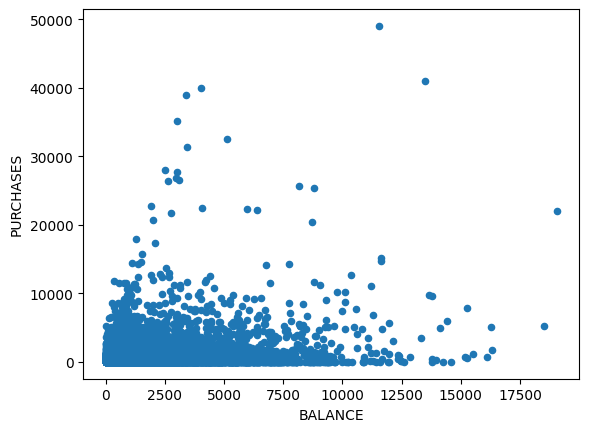

In [5]:
tarjetas.plot(kind= 'scatter', x = 'BALANCE', y = 'PURCHASES')

Revisamos la existencia de datos nulos en la base de datos y por variable. Observamos que la mayor cantidad de valores nulos se encuentran en la variable `MINIMUM_PAYMENTS`.

In [9]:
tarjetas.isnull().sum().sort_values(ascending=False)

MINIMUM_PAYMENTS                    313
CREDIT_LIMIT                          1
CUST_ID                               0
BALANCE                               0
PRC_FULL_PAYMENT                      0
PAYMENTS                              0
PURCHASES_TRX                         0
CASH_ADVANCE_TRX                      0
CASH_ADVANCE_FREQUENCY                0
PURCHASES_INSTALLMENTS_FREQUENCY      0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_FREQUENCY                   0
CASH_ADVANCE                          0
INSTALLMENTS_PURCHASES                0
ONEOFF_PURCHASES                      0
PURCHASES                             0
BALANCE_FREQUENCY                     0
TENURE                                0
dtype: int64

In [10]:
tarjetas.isnull().sum().sort_values(ascending=False).head()

MINIMUM_PAYMENTS    313
CREDIT_LIMIT          1
CUST_ID               0
BALANCE               0
PRC_FULL_PAYMENT      0
dtype: int64

<p align="justify">
Realizamos la estandarización de los datos y hacemos una limpieza simple como transformar los valores nulos en ceros y eliminar la primer y última columna.

In [11]:
scaler = StandardScaler()
tarjetas_standard = scaler.fit_transform(tarjetas.iloc[:,1:].fillna(0))

<p align="justify">
Realizamos un mapa de calor de las correlaciones entre las variables con <code>plotly</code>.
<br>
<br>
Las altas correlaciones entre variables son perjudiciales para el algoritmo porque están brindando prácticamente la misma información para trabajar.

In [23]:
px.imshow(tarjetas.fillna(0).corr().round(2),
          aspect="auto",
          text_auto = True)

<ipython-input-23-a0c27b9274f3>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



In [24]:
tarjetas_standard

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.2973097 ,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.10204243,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.08848934,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.32175099,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.33316552,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.31923775,
        -0.52555097, -4.12276757]])

#**<font color="DeepPink">K - Means en Scikit Learn</font>**


<p align="justify">
La librería <code>Scikit-learn</code> cuenta con el método ya programado para trabajar. Tiene diversos parámetros ue modifican los resultados, los principales son:

**n_clusters**: Es el númerod e grupos que queremos formar

**init**: Se elige entre el método "*k-means++*" o entre el método "*random*". Es la forma en que se inicializa el método.

**n_init**: es el número de veces que el algoritmo se ejecuta con diferentes semillas de centroides.

**random_state**: para elegri una semilla que nos permita obtener los mismos resultados luego.

Ahora inicializamos el objeto con los parámetros que elijamos.


In [25]:
km = cl.KMeans(n_clusters= 5, n_init = 1) #creamos el objeto tipo kmeans de sklearn
km.fit(tarjetas_standard) #ajustamos con el método fit

KMeans(n_clusters=5, n_init=1)

<p align="justify">
Una vez que está ajustado, el objeto contiene el método <code>predict</code> o <code>fit_predict</code> (antes de ajustar) que devuelve un array con las categorías de grupos.

In [26]:
km.predict(tarjetas_standard)

array([3, 0, 4, ..., 2, 3, 3], dtype=int32)

<p align="justify">
Otra forma de ver las diferentes categorías que asigno a cada uno de los datos, es utilizando el atributo "labels_" del objeto.

In [27]:
km.labels_

array([3, 0, 4, ..., 2, 3, 3], dtype=int32)

<p align="justify">
Las variaciones en los parámetros va generando cambios en las asignaciones de grupos, por lo tanto es importante probar diferentes parametrizaciones y evaluar cual devuelve mejores resultados.

In [28]:
# Cremos un diccionario en dónde generamos objetos KMeans con distintos parámetros.

n_grupos = 5
km = {'km1': cl.KMeans(n_clusters = n_grupos, init = "random", n_init = 1, random_state = 5464),
      'km2': cl.KMeans(n_clusters = n_grupos, init = "random", n_init = 10, random_state = 5464),
      'km3': cl.KMeans(n_clusters = n_grupos, init = "random", n_init = "auto", random_state = 5464),
      'km4': cl.KMeans(n_clusters = n_grupos, init = "k-means++", n_init = 1, random_state = 5464),
      'km5': cl.KMeans(n_clusters = n_grupos, init = "k-means++", n_init = 10, random_state = 5464)
      }

# Para cada objeto del diccionario ajustamos el objeto con el método fit

for v in km.values():
  v.fit(tarjetas_standard)

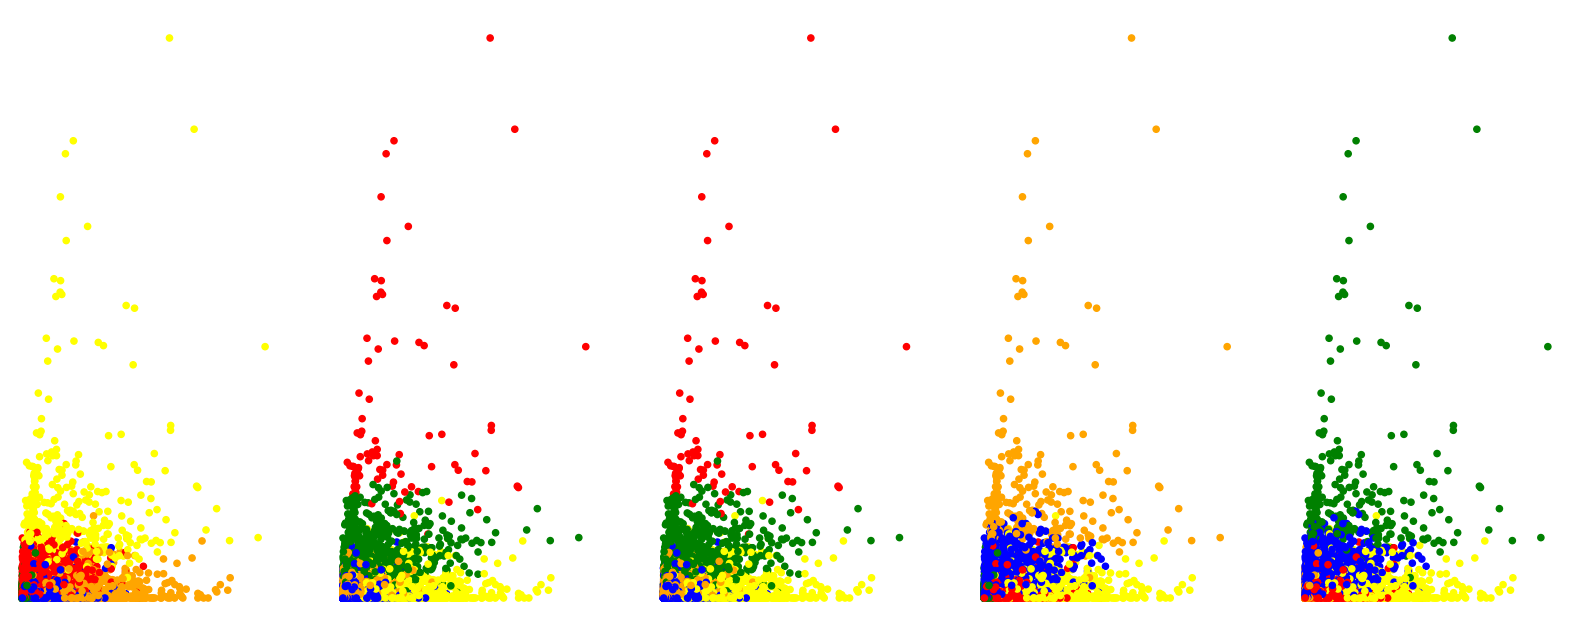

In [29]:
fig, ax = plt.subplots(1,5, figsize = (20,8))
j = 0
for v in km.values():
  colores = []
  for i in v.labels_:
    if i == 0:
      colores.append('blue')
    elif i == 1:
      colores.append('green')
    elif i == 2:
      colores.append('red')
    elif i == 3:
      colores.append('orange')
    else:
      colores.append('yellow')
  tarjetas.plot(kind = 'scatter', x = 'BALANCE', y = 'PURCHASES', c = colores, ax = ax[j])
  ax[j].set_axis_off()
  j += 1

<p align="justify">
<b>¿Cómo sabemos que parámetros elegir?</b>
<br>
<br>
Como todo algorimto de aprendizaje automático estamos minimizando una función, por lo tanto el algoritmo que tenga el valor mínimo de la función de costo es el que vamos a adoptar como más óptimo.
<br>
<br>
👀 La función de costo se conococe como <b>inercia</b> o <b>la suma de los cuadrados de las diferencias intraclusters</b>
<br>
<br>
\begin{equation}
WSS = \sum_{k=1}^{K}\sum_{i\in k}||x_i-\mu_k||_2^2
\end{equation}

In [32]:
for k,v in km.items():
  print("para el modelo {} la inercia fue de {}".format(k, v.inertia_))

para el modelo km1 la inercia fue de 92116.50235036813
para el modelo km2 la inercia fue de 91485.49181877404
para el modelo km3 la inercia fue de 91485.49181877404
para el modelo km4 la inercia fue de 92097.98263763008
para el modelo km5 la inercia fue de 92095.59466054427


#**<font color="DeepPink">¿Cómo saber cuantos grupos utilizar?</font>**


<p align="justify">
Uno de los problemas que surge en el aprendizaje no supervisado es que no sabemos cual es la respuesta correcta. Sin embargo de antes de empezar el modelo tenemos que definir parámetros que no sabemos si son los que mejor rinden.
<br>
<br>
El más importante es el número de grupos en el cual yo quiero agrupar los datos, siguiendo lo planteado anteriormente la forma de elegirlos sería minimizando la inercia. ¿Es esto correcto?
<br>
<br>
La respuesta es que no porque el $WSS$ se hace $0$ cuando $K=n$ y esto significaría que no ha aprendido nada.
<br>
<br>
Una de las técnicas utilizadas para definir es el gráfico de codo (<b>elbow plot</b>) en estos casos vamos a elegir la cantidad de grupos en los que la mejora en la inercia no sea tan notoria.


<p align="center">
<img src="https://github.com/cristiandarioortegayubro/BDS/blob/main/images/Clustering-001.png?raw=true" width="500">
</p>

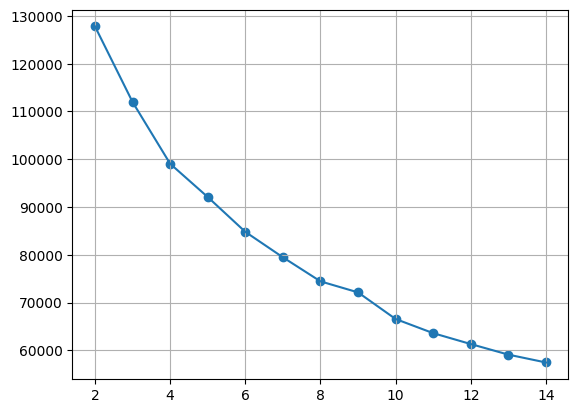

In [33]:
n_grups = range(2,15)

inercia = []
for i in n_grups:
  km_ = cl.KMeans(n_clusters = i, n_init = 10,init = "k-means++", random_state = 5464 )
  km_.fit(tarjetas_standard)
  inercia.append(km_.inertia_)
plt.scatter(n_grups, inercia)
plt.plot(n_grups, inercia)
plt.grid()
#fig = px.line(x=n_grups, y=inercia, title='Inercia KMenas')
#fig.show()

<p align="justify">
En la práctica no queda tan claro cual elegir o va depender del tipo de problema. Para el caso pareciera ser que el óptimo son solo 4 grupos que es en donde parece haber un quiebre.



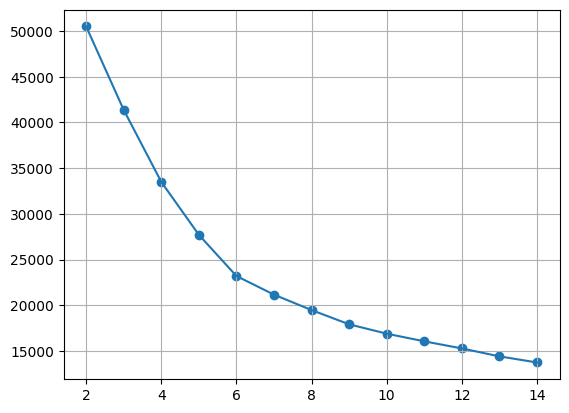

In [34]:
n_grups = range(2,15)

inercia = []
for i in n_grups:
  km_ = cl.KMeans(n_clusters = i, n_init = 10,init = "k-means++", random_state = 5464 )
  X = tarjetas_standard[:,:7]
  #X = tarjetas_standard[:,col]
  km_.fit(X)
  inercia.append(km_.inertia_)
plt.scatter(n_grups, inercia)
plt.plot(n_grups, inercia)
plt.grid()
#fig = px.line(x=n_grups, y=inercia, title='Inercia KMenas')
#fig.show()

<p align="justify">
Sin embargo si reducimos el número de variables y tomamos por ejemplo las primera 7 variables del <code>DataFrame</code> se ve más claro el gráfico y se define en 6 grupos.

 # **<font color="DeepPink">Agrupamiento Aglomerativo o Jerárquico</font>**

<p align="justify">
Con la librería <code>scikitlearn</code> también tenemos la posibilidad de agrupar los datos de acuerdo a la técnica de árboles jerárquicos.
<br>
<br>
Dentro de los parámetros que tiene el método, los principales son:

**n_clusters**: Cantidad de grupos

**affinity**: Es la métrica usada para calcular las distancias entre los diferentes datos. Generalmente se usa la euclidiana.

**metric**: Es la métrica que se va usar en el enlace pueden ser varias pero si el enlace es "ward" entonces solo se acepta la euclidiana.

**linkage**: Puede ser "ward", "complete", "average", "single" . Es la forma en que se van a ir conectando los datos.

<br>
<p align="justify">
La forma de trabajo con <code>Scikit-learn</code> es la misma que con <code>K-means</code>. En general es muy similar a la forma de trabajo que tiene la librería.

In [35]:
aglo = cl.AgglomerativeClustering(n_clusters = 5)
aglo.fit(tarjetas_standard)

AgglomerativeClustering(n_clusters=5)

In [36]:
aglo.labels_

array([0, 2, 1, ..., 0, 0, 0])

In [37]:
tarjetas.groupby(aglo.labels_).mean()

<ipython-input-37-0e12bb5f8c8b>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1012.016553,0.788902,358.589289,219.517945,139.384763,603.012243,0.278495,0.091316,0.186543,0.103774,1.883809,4.819841,3388.892565,1013.045471,789.013615,0.114666,11.166317
1,694.705051,0.974729,1148.686293,542.131032,606.650442,111.435701,0.911184,0.319830,0.696222,0.023178,0.423325,21.387097,4116.415520,1251.342124,455.835144,0.309138,11.955831
2,4065.168472,0.980136,633.955236,360.104700,274.136579,3815.350669,0.360169,0.148230,0.271646,0.447065,13.095000,10.760000,6788.035714,3114.393783,1490.278807,0.032914,11.839286
3,4812.382778,0.956126,27505.339565,22417.452174,5087.887391,1617.786145,0.905072,0.846377,0.708696,0.061594,2.608696,124.130435,16000.000000,28138.984873,2599.090939,0.533432,11.913043
4,2654.574518,0.983639,4615.815202,2881.063038,1735.558616,379.692374,0.940439,0.678974,0.769869,0.054747,1.141129,64.056452,7930.309140,4237.411751,1194.806130,0.198594,11.961022


In [38]:
n_grupos = 5

aglo = {"aglo1" : cl.AgglomerativeClustering(n_clusters = n_grupos,  metric = 'euclidean', linkage = 'ward'),
        "aglo2" : cl.AgglomerativeClustering(n_clusters = n_grupos,  metric = 'euclidean', linkage = 'single'),
        "aglo3" : cl.AgglomerativeClustering(n_clusters = n_grupos,  metric = 'euclidean', linkage = 'complete'),
        "aglo4" : cl.AgglomerativeClustering(n_clusters = n_grupos,  metric = 'euclidean', linkage = 'average'),
        "aglo5" : cl.AgglomerativeClustering(n_clusters = n_grupos,  metric = 'cosine', linkage = 'average')
    }

for v in aglo.values():
  v.fit(tarjetas_standard)

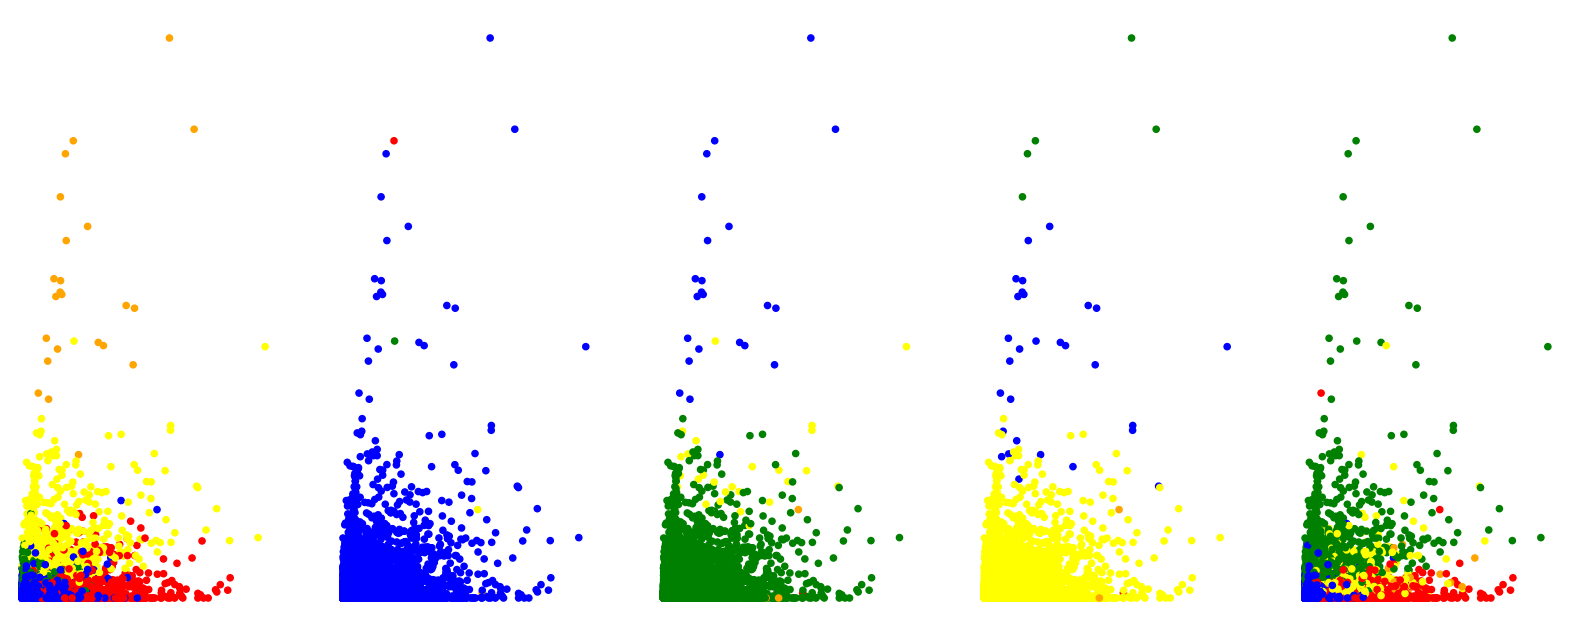

In [39]:
fig, ax = plt.subplots(1,5, figsize = (20,8))
j = 0
for v in aglo.values():
  colores = []
  for i in v.labels_:
    if i == 0:
      colores.append('blue')
    elif i == 1:
      colores.append('green')
    elif i == 2:
      colores.append('red')
    elif i == 3:
      colores.append('orange')
    else:
      colores.append('yellow')
  tarjetas.plot(kind = 'scatter', x = 'BALANCE', y = 'PURCHASES', c = colores, ax = ax[j])
  ax[j].set_axis_off()
  j += 1

<p align="justify">
Considerando las dos variables como para el caso de <code>K-means</code> se puede ver que la forma que tiene de agrupar es diferente.
<br>
<br>
<mark>Por lo general este tipo de métodos suele identificar de forma más clara los <b>outlier</b></mark> y los separa en grupos diferentes. Esto se debe a que si están muy separados se van a conectar entre ellos primero, pero luego van a tardar en unirse al resto.
<br>
<br>
👀 Esto hace que haya muchos grupos con pocas observaciones. Funciona bien con muchos datos y muchos grupos, <code>K-means</code> no tiende a funcionar muy bien cuando son muchos grupos.

 # **<font color="DeepPink">Métricas de rendimiento</font>**

<p align="justify">
Una de las dificultades que presenta el aprendizaje no supervisado es que no existe algún método que funcione mejor que otro, además, la modificación de los denominados hiperparámetros afecta sensiblemente el rendimiento del algoritmo empleado. Por lo tanto, se busca comparar varias metodologías que se usan habitualmente para la detección de clústeres, e incluso comparar varias veces la misma metodología, pero variando los hiperparámetros.
<br>
<br>
Para esto hay que evaluarlos usando métricas de rendimineto.
<br>
<br>
👀 Como hemos visto una de las métricas para evaluar el algoritmo es la inercia.  El problema que tiene esta que nos da un valor que no se puede comparar o no se puede medir que tan lejos estamos de lo óptimo.
<br>
<br>
Una forma de subsanar eso es usando el ratio que surge entre la suma de cuadrados entre clusters y la suma de cuadrados total.
<br>
<br>
\begin{equation}
RBTSS = \frac{BSS}{TSS}
\end{equation}
<br>
De esta manera nos va dar un valor que se encuentra entre 0 y 1 siendo 1 el valor óptimo.
<br>
<br>
🛑 Esta métrica no se encuentra establecida dentro de la librería <code>Scikit- learn</code>, por lo tanto si se quiere utilizar es necesario programarla 😃

In [40]:
import numpy as np
def dist(x,y):
    x = np.array(x)
    y = np.array(y)
    return np.sum((x-y)**2)

def wss(X):
    X = np.array(X)
    C = np.mean(X,axis = 0)
    filas = X.shape[0]
    rdo = []
    for i in range(filas-1):
        x = X[i,:]
        #r = []
        r = dist(x,C)
        #for j in range(1,filas):
        #    y = X[j,:]
        #    r.append(dist(x,y))
        rdo.append(r)
    return np.sum(rdo)

def SSD(X, grupos):
    X = np.array(X)
    grupos = np.array(grupos)
    g = np.unique(grupos)
    WSS = []
    for i in g:
        x = X[grupos == i]
        WSS.append(wss(x))
    TSS = wss(X)
    BSS = TSS-np.sum(WSS)
    RBTSS = BSS/TSS
    return {'TSS': TSS, 'WSS': np.sum(WSS)/len(WSS), 'BSS': BSS, 'RBTSS':RBTSS}

In [41]:
SSD(tarjetas_standard, aglo['aglo5'].labels_)

{'TSS': 152125.30885616355,
 'WSS': 23002.849969327654,
 'BSS': 37111.059009525285,
 'RBTSS': 0.24395059105263195}

<p align="justify">
De acuerdo al diccionario de metodologías jerárquicas ahora podemos calcular esta métrica para cada una. Y por supuesto también podemos compararlo con el método <code>k-means</code> calculado previamente...

In [42]:
for k, v in aglo.items():
  rbtss = round(SSD(tarjetas_standard, v.labels_)['RBTSS'],2)
  print("Para el método {} el RBTSS fue de {}".format(k,rbtss))

Para el método aglo1 el RBTSS fue de 0.34
Para el método aglo2 el RBTSS fue de 0.03
Para el método aglo3 el RBTSS fue de 0.13
Para el método aglo4 el RBTSS fue de 0.12
Para el método aglo5 el RBTSS fue de 0.24


Ahora lo calculamos para el modelo `K-means` que habíamos seleccionado previamente.

In [ ]:
SSD(tarjetas_standard, km['km5'].labels_)

{'TSS': 143192.30606858616,
 'WSS': 16525.33318554089,
 'BSS': 60565.640140881704,
 'RBTSS': 0.4229671398117718}

<p align="justify">
De acuerdo a está métrica de rendimiento nos conviene seguir eligiendo el modelo <code>K-Means</code> con las caracaterísticas del Km5

 ## **<font color="DeepPink">Coeficiente de Siluetas</font>**

<p aling="justify">
Otra métrica muy utilizada en la literatura es el coeficiete de siluetas. Este tiene ventajas sobre la suma de cuadrados de las desviaciones porque castiga el exceso de grupos.
<br>
<br>
\begin{equation}
s=\frac{b-a}{max(a,b)}
\end{equation}
<br>
siendo $a$ la distancia media entre una observación y todos los elementos de su grupo y $b$ la distancia media entre una observación y todos los elementos de su grupo más próximo. Este coeficiente va de -1 a 1 siendo el valor de 1 el que mejor rendimiento presenta.

In [43]:
from sklearn.metrics import silhouette_score, silhouette_samples

rdos = {}

for k,v in km.items():
  sil = silhouette_score(tarjetas_standard, v.labels_)
  rdos[k] = sil

for k,v in aglo.items():
  sil = silhouette_score(tarjetas_standard, v.labels_)
  rdos[k] = sil

pd.DataFrame(rdos, index = ['sil']).T.sort_values('sil')

,sil
aglo5,0.106370
aglo1,0.138527
km4,0.191153
km5,0.191319
km1,0.192505
km2,0.193259
km3,0.193259
aglo3,0.659914
aglo4,0.749844
aglo2,0.811628


<p align="justify">
El coeficiente de siluetas en realidad se calcula unidad por unidad, esto permite definir  que unidad se encuentra bien asignada al grupo y cual esta mal asignada.
<br>
<br>
Si el coeficiente es positivo, esto indica que el punto se encuentra más cerca de todos los vecinos de su mismo grupo que del grupo vecino más cercano. Por lo tanto está bien asignado.
<br>
<br>
Si el coeficiente es 0, indica que la asginación es difusa, porque están a la misma distancia entre este grupo y el vecino.
<br>
<br>
Si el coeficiente es negativo, directamente indica una mala asignación al grupo.
<br>
<br>
📊 Una forma de mirar esto más fácil es con el gráfico de siluetas. Este gráfico nos va permitir observar la cantidad de unidades asignadas a cada grupo, cuantas unidades están bien asignadas y  cuantas están mal asignadas.

In [44]:
#importamos el mapa de colores
from matplotlib import cm

#Creamos una función que realiza el gráfico de siluetas
def graficoSiluetas(X, met):
  labels = np.unique(met.labels_) # define los niveles de los grupos
  n_clusters = labels.shape[0] #cantidad de grupos
  siluetas = silhouette_samples(X, met.labels_) #aplica el coef. de siluetas  uno a uno
  y_ax_lower, y_ax_upper = 0,0  # el lower define el piso en el que va empezar el grupo y el upper en dónde finaliza
  yticks = []
  for i, c in enumerate(labels):
    c_siluetas = siluetas[met.labels_ == c] #determina los valores del coef. para cada grupo
    c_siluetas.sort()
    y_ax_upper += len(c_siluetas)
    color = cm.jet(float(i)/n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper),
            c_siluetas,
            height = 1,
            edgecolor = 'none',
            color = color
            )
    yticks.append((y_ax_lower + y_ax_upper)/2)
    y_ax_lower += len(c_siluetas)

  silueta_prom = np.mean(siluetas)
  plt.axvline(silueta_prom, color = 'red', linestyle = "--")
  plt.yticks(yticks, labels+1)
  plt.ylabel('Grupo')
  plt.xlabel('Coeficiente de siluetas')
  plt.show()

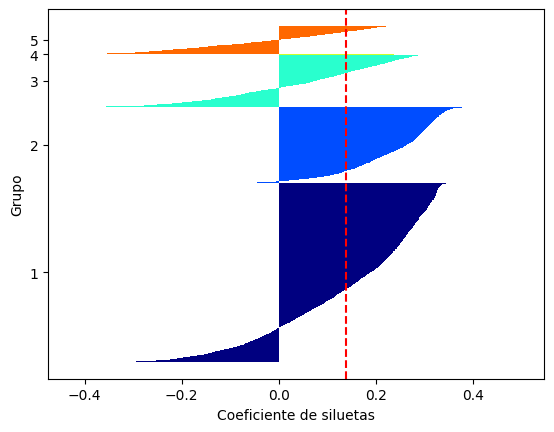

In [45]:
graficoSiluetas(tarjetas_standard, aglo['aglo1'])

<p align="justify">
Para el método jerarquico 1 que armamos podemos ver que el grupo 4 casi no tiene asignada unidades que el grupo 2 y 3 presentan un alto porcentaje de unidades mal asignadas y que el grupo 5 parece ser el que mejor asginación presenta.

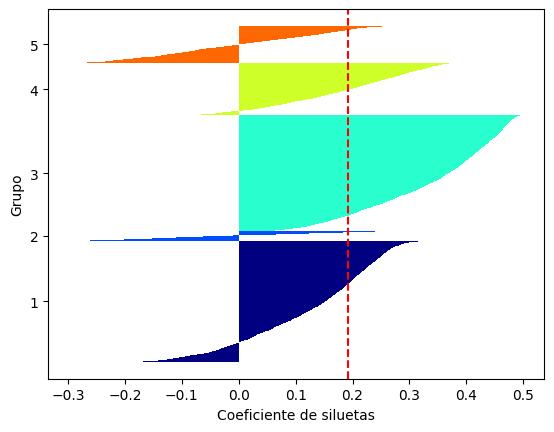

In [46]:
graficoSiluetas(tarjetas_standard, km['km5'])

<p align="justify">
Para el <code>K-means</code> con los parámetros de km5 vemos que tenemos muy bien asignados los grupos 2 y 3. El grupo 5 se encuentra con muy pocas unidades y un gran porcentaje mal asignada y altos porcentajes de mal asignación para el grupo 4 y el grupo 1.

 # **<font color="DeepPink">Conclusiones</font>**

<p align="justify">
👀 En este colab nosotros:
<br><br>
✅ Utilizamos algunos métodos de clustering que ofrece la librería <code>scikit-learn</code>.
<br>
✅ Seleccionamos los parámetros óptimos en un algoritmo <code>K-means</code> y en un agrupamiento jerárquico.
<br>
✅ Aprendimos una técnica para seleccionar el número óptimo de grupos de un algoritmo.
<br>
✅ Evaluamos los clusters obtenidos utilizando las métricas de rendimiento más comunes que existen actualmente.
